# Simulation

In [1]:
import numpy as np

## Parameters

In [2]:
density_water = 1000  # kg/m^3
density_object = 500  # kg/m^3
object_volume = 0.1  # m^3
g = 9.81  # m/s^2
time_step = 0.01  # s
time_max = 10  # s

In [3]:
time = 0  # s
depth = 0  # m
velocity = 0  # m/s
acceleration = 0  # m/s^2
buoyancy =   density_water * g * object_volume # N
weight =  density_object * g * object_volume # N

In [4]:
# lists for plotting later
time = np.arange(0, time_max, time_step)
position = np.zeros_like(time)
velocity = np.zeros_like(time)
acceleration = np.zeros_like(time)

In [5]:
# simulation loop
for i in range(1, len(time)):
    # calculate the force on the object
    # Ft = Fb - Fg
    force = buoyancy - weight
    # calculate acceleration
    # F = ma -> a = m / F
    acceleration[i] = force / (weight / g)
    # calculate velocity
    # V(t) = at + V0
    velocity[i] = velocity[i - 1] + acceleration[i - 1] * time_step
    # calculate position
    # X(t) = X0 + V0t + 1/2 at^2
    position[i] = velocity[i - 1] * time_step + position[i - 1]


# Plot the results

In [6]:
import matplotlib.pyplot as plt

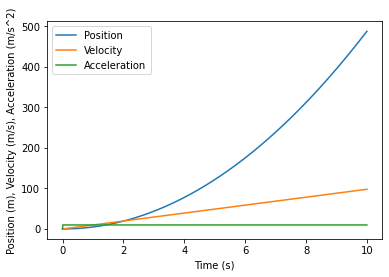

In [7]:

plt.plot(time, position, label="Position")
plt.plot(time, velocity, label="Velocity")
plt.plot(time, acceleration, label="Acceleration")
plt.xlabel("Time (s)")
plt.ylabel("Position (m), Velocity (m/s), Acceleration (m/s^2)")
plt.legend()
plt.show()

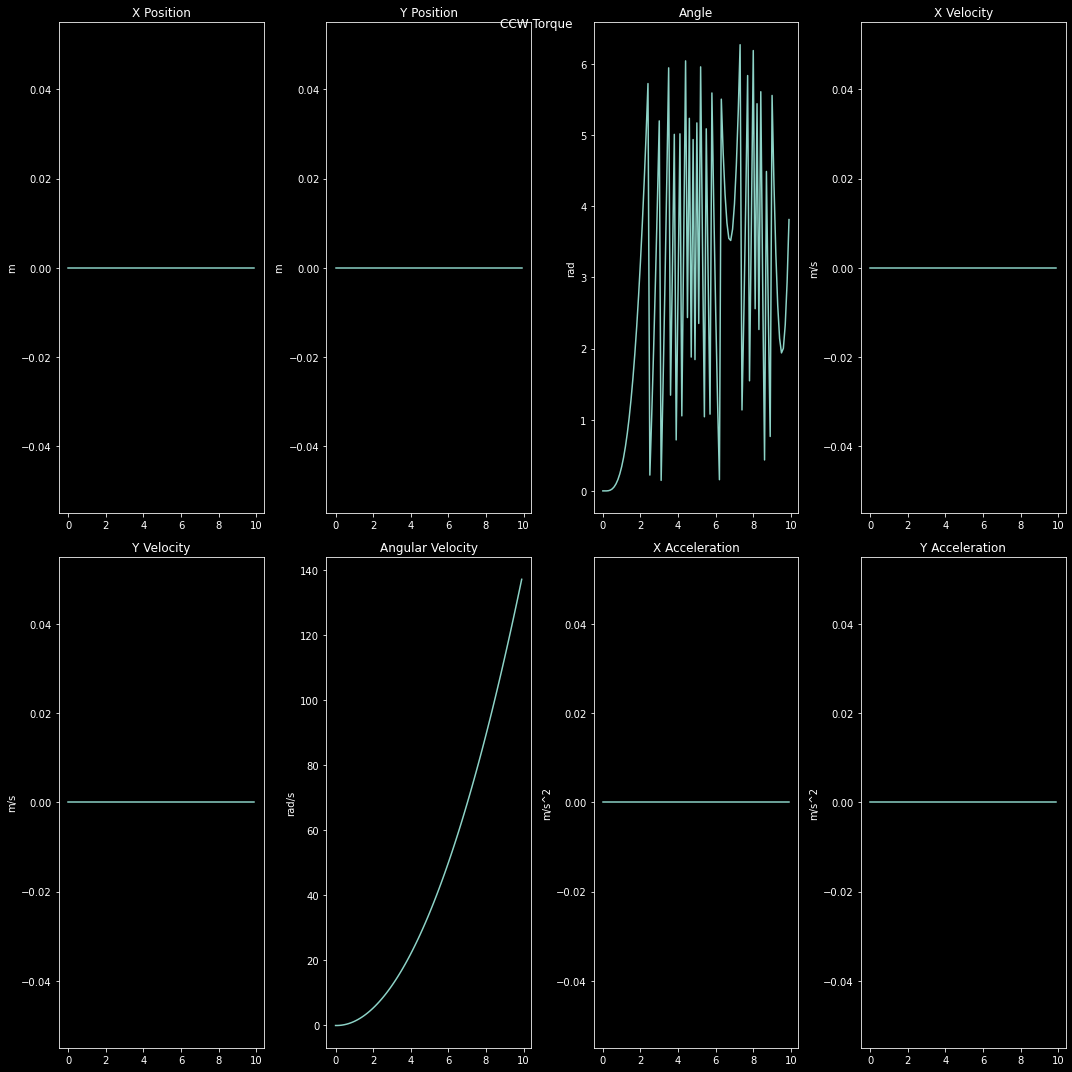

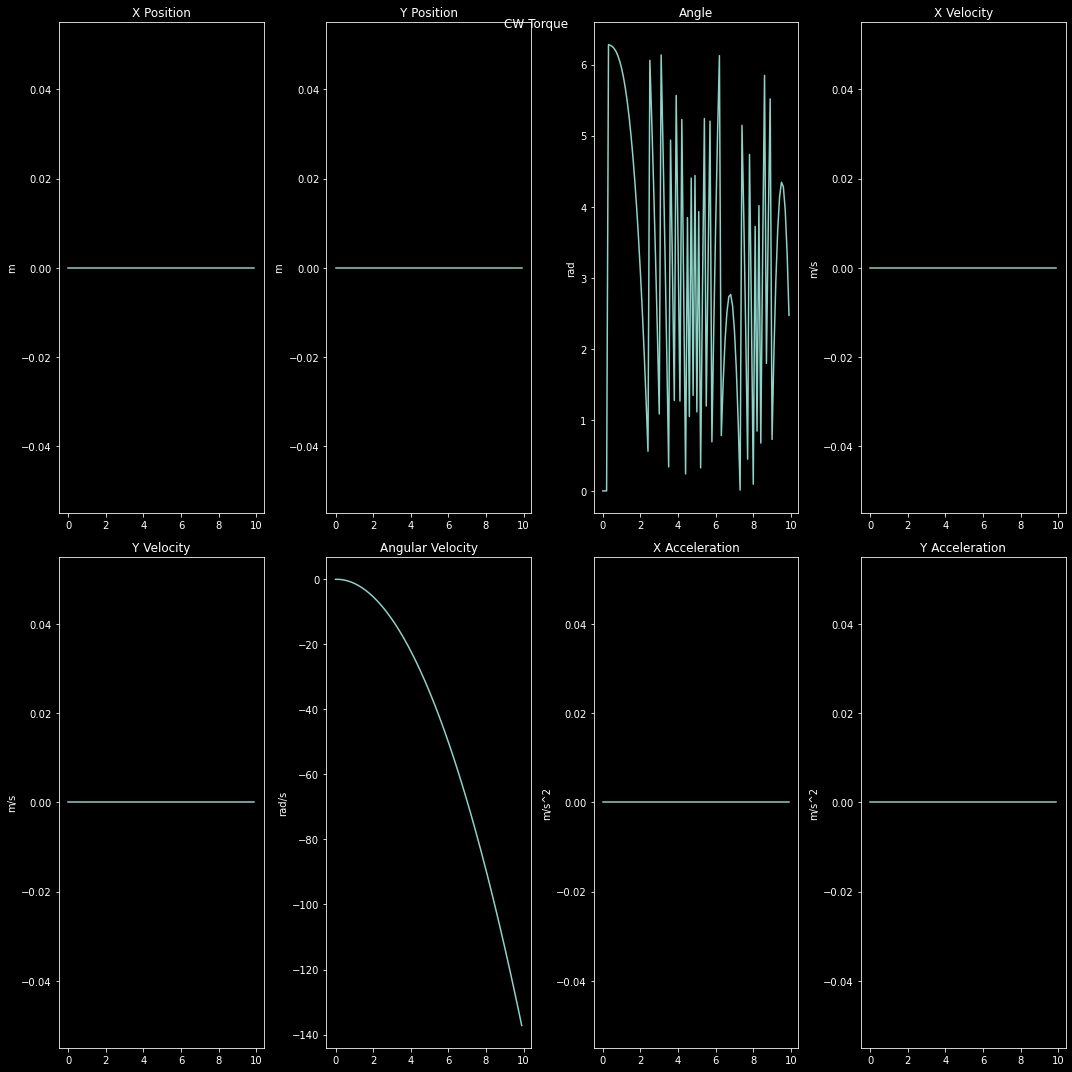

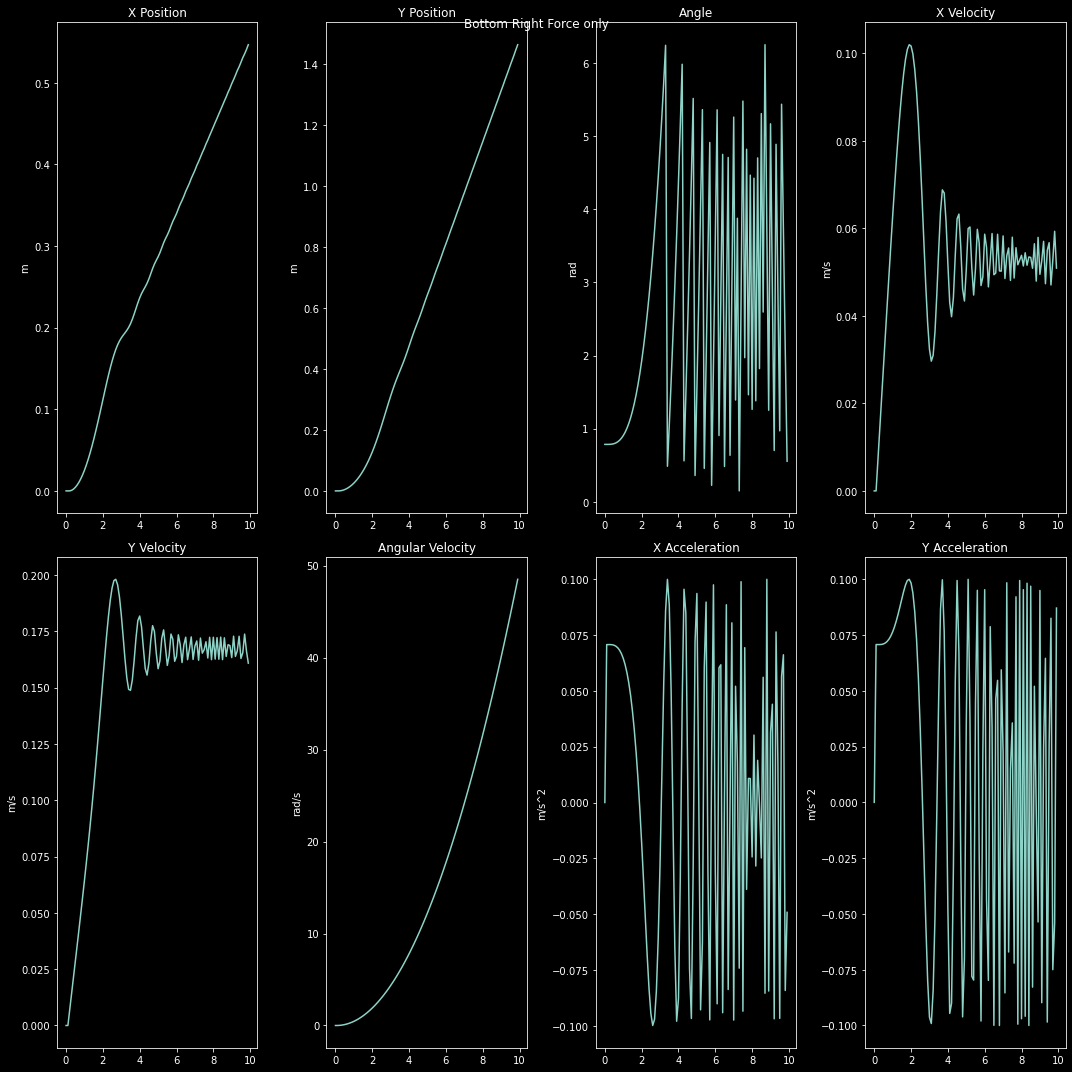

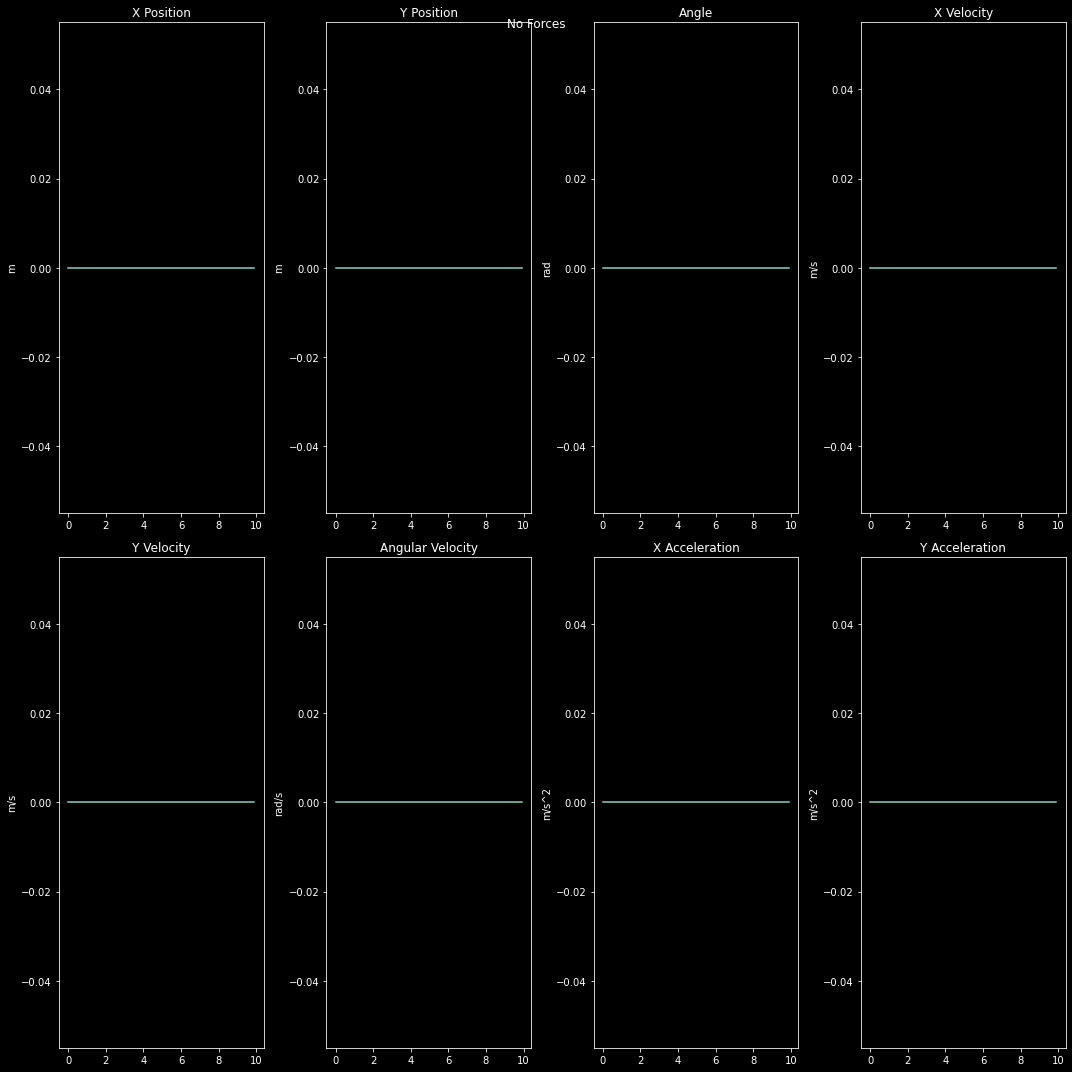

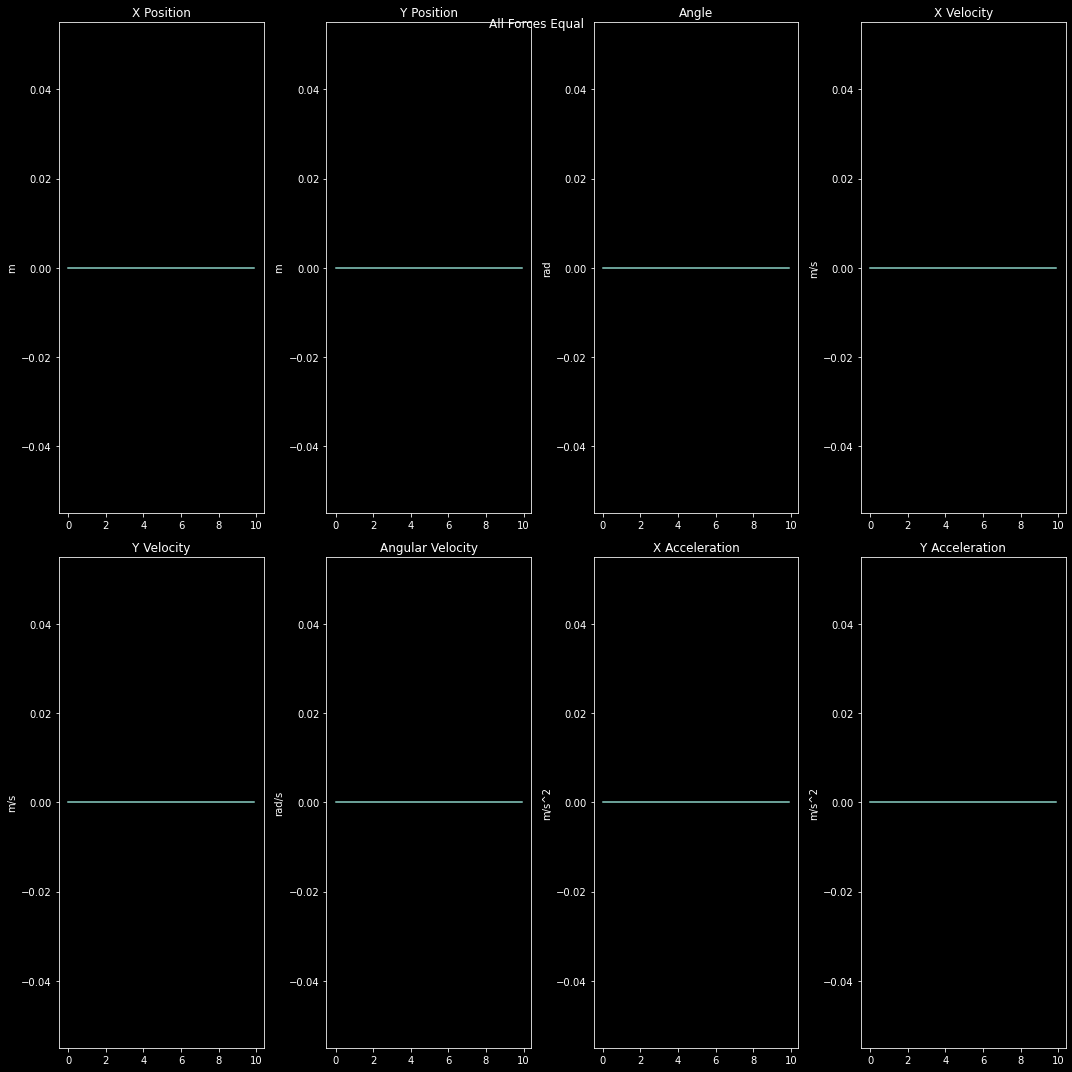

In [8]:
import physics
import numpy as np
# CCW Torque
(times, x, y, theta, v, omega, a) = physics.simulate_auv2_motion(np.array([10, 0, 10, 0]), np.pi / 4, 1, 1)
# physics.plot_auv2_motion(times, x, y, theta, v, omega, a)
physics.plot_auv2_motion_individual(times, x, y, theta, v, omega, a, "CCW Torque")

# CW Torque
(times, x, y, theta, v, omega, a) = physics.simulate_auv2_motion(np.array([0, 10, 0, 10]), np.pi / 4, 1, 1)
# physics.plot_auv2_motion(times, x, y, theta, v, omega, a)
physics.plot_auv2_motion_individual(times, x, y, theta, v, omega, a, "CW Torque")

# 1 force
(times, x, y, theta, v, omega, a) = physics.simulate_auv2_motion(np.array([10, 0, 0, 0]), 0, 1, 1, initial_theta=np.pi/4)
# physics.plot_auv2_motion(times, x, y, theta, v, omega, a)
physics.plot_auv2_motion_animated(times, x, y)
physics.plot_auv2_motion_individual(times, x, y, theta, v, omega, a, "Bottom Right Force only")

# 0 force
(times, x, y, theta, v, omega, a) = physics.simulate_auv2_motion(np.array([0, 0, 0, 0]), np.pi / 4, 1, 1)
# physics.plot_auv2_motion(times, x, y, theta, v, omega, a)
physics.plot_auv2_motion_individual(times, x, y, theta, v, omega, a, "No Forces")

# equal forces
(times, x, y, theta, v, omega, a) = physics.simulate_auv2_motion(np.array([10, 10, 10, 10]), np.pi / 4, 1, 1)
# physics.plot_auv2_motion(times, x, y, theta, v, omega, a)
physics.plot_auv2_motion_individual(times, x, y, theta, v, omega, a, "All Forces Equal")
